<a href="https://colab.research.google.com/github/Charan0622/Charan_Scifor/blob/main/NLP/Assignments/Sentiment%20Analysis%20%26%20Text%20Processing/TP_SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load the dataset
df = pd.read_csv('RickAndMortyScripts.csv')

# Display the first few rows of the dataset
print(df.head())

   index  season no.  episode no. episode name   name  \
0      0           1            1        Pilot   Rick   
1      1           1            1        Pilot  Morty   
2      2           1            1        Pilot   Rick   
3      3           1            1        Pilot  Morty   
4      4           1            1        Pilot   Rick   

                                                line  
0  Morty! You gotta come on. Jus'... you gotta co...  
1                       What, Rick? What’s going on?  
2                   I got a surprise for you, Morty.  
3  It's the middle of the night. What are you tal...  
4  Come on, I got a surprise for you.  Come on, h...  


In [11]:
# Download stopwords and VADER lexicon if not already available
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [13]:
# Apply text cleaning
df['cleaned_line'] = df['line'].apply(clean_text)

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

def get_sentiment(text):
    return sid.polarity_scores(text)['compound']

In [14]:
# Apply sentiment analysis
df['sentiment'] = df['cleaned_line'].apply(get_sentiment)

# Display the sentiment scores
print(df[['line', 'cleaned_line', 'sentiment']].head())

                                                line  \
0  Morty! You gotta come on. Jus'... you gotta co...   
1                       What, Rick? What’s going on?   
2                   I got a surprise for you, Morty.   
3  It's the middle of the night. What are you tal...   
4  Come on, I got a surprise for you.  Come on, h...   

                        cleaned_line  sentiment  
0  morty got ta come jus got ta come     0.0000  
1                   rick whats going     0.0000  
2                 got surprise morty     0.2732  
3               middle night talking     0.0000  
4       come got surprise come hurry     0.2732  


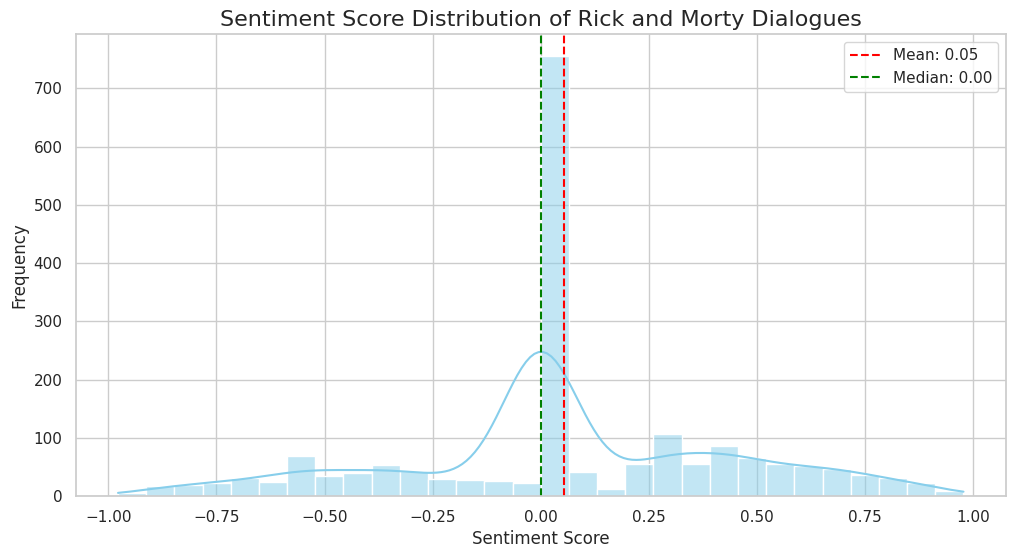

In [15]:
# Plot 1: Sentiment Score Distribution with Annotations
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.histplot(df['sentiment'], bins=30, kde=True, color='skyblue')

mean_sentiment = df['sentiment'].mean()
median_sentiment = df['sentiment'].median()
plt.axvline(mean_sentiment, color='red', linestyle='--', label=f'Mean: {mean_sentiment:.2f}')
plt.axvline(median_sentiment, color='green', linestyle='--', label=f'Median: {median_sentiment:.2f}')

plt.title('Sentiment Score Distribution of Rick and Morty Dialogues', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

<ipython-input-16-4d2581370f96>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_sentiment_by_character.values, y=average_sentiment_by_character.index, palette='viridis')


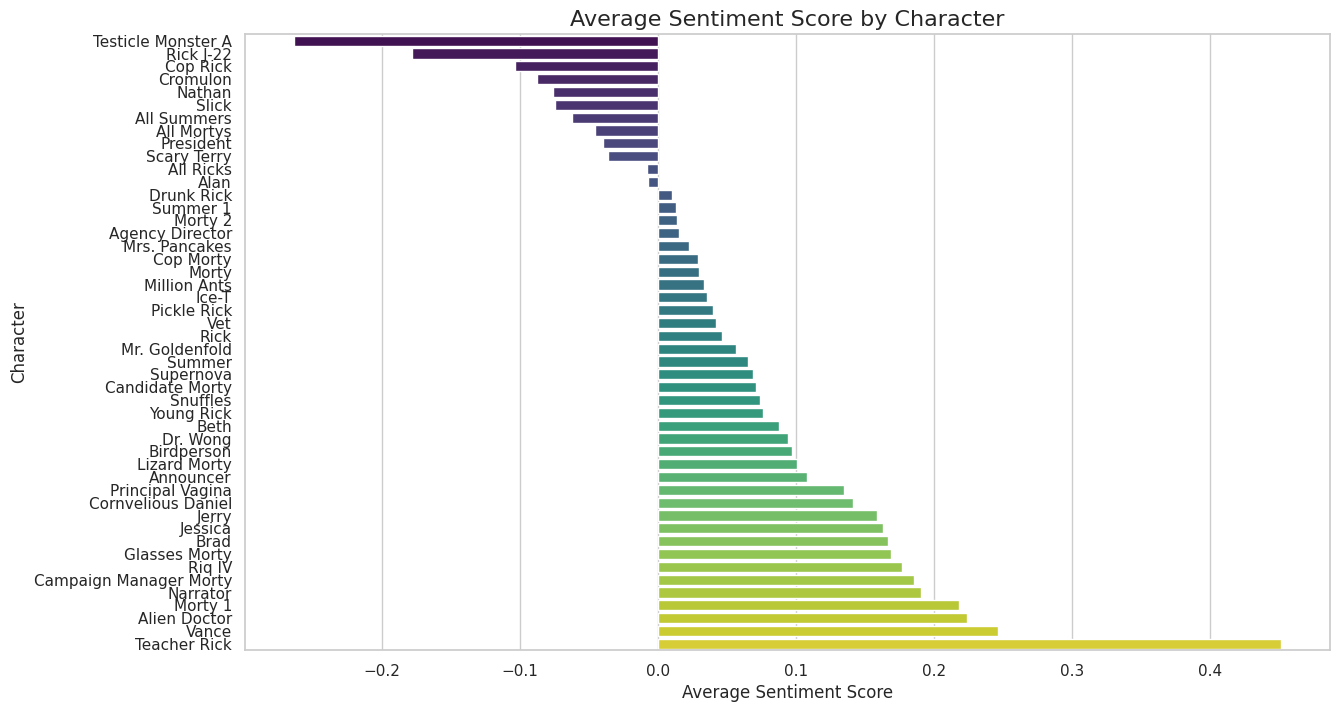

In [16]:
# Plot 2: Average Sentiment Score by Character
plt.figure(figsize=(14, 8))
average_sentiment_by_character = df.groupby('name')['sentiment'].mean().sort_values()
sns.barplot(x=average_sentiment_by_character.values, y=average_sentiment_by_character.index, palette='viridis')

plt.title('Average Sentiment Score by Character', fontsize=16)
plt.xlabel('Average Sentiment Score', fontsize=12)
plt.ylabel('Character', fontsize=12)
plt.show()

In [19]:
# Save the processed data
df.to_csv('RickAndMortyProcessed.csv', index=False)